# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [ ]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [ ]:
# show the first review


In [ ]:
# convert the list of dictionaries to a DataFrame


In [ ]:
# add DataFrame columns for cool, useful, and funny


In [ ]:
# drop the votes column and then display the head


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [4]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
#yelp.dtypes
yelp['stars'] = yelp['stars'].astype('category')
yelp.dtypes


business_id      object
date             object
review_id        object
stars          category
text             object
type             object
user_id          object
cool              int64
useful            int64
funny             int64
dtype: object

In [5]:
yelp.mean(axis=0, numeric_only=True)

cool      0.8768
useful    1.4093
funny     0.7013
dtype: float64

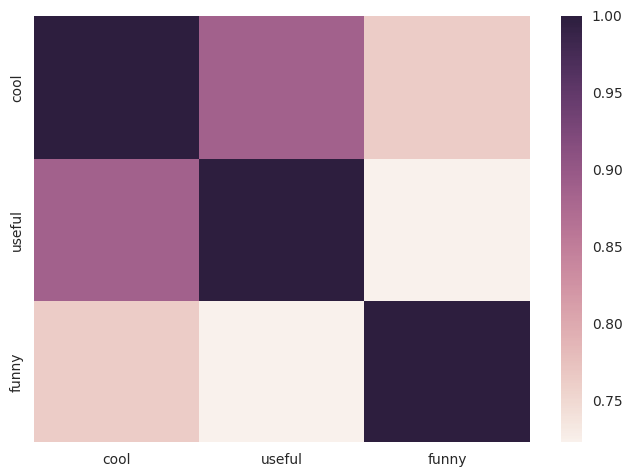

In [6]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4799cf750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd479502950>]], dtype=object)

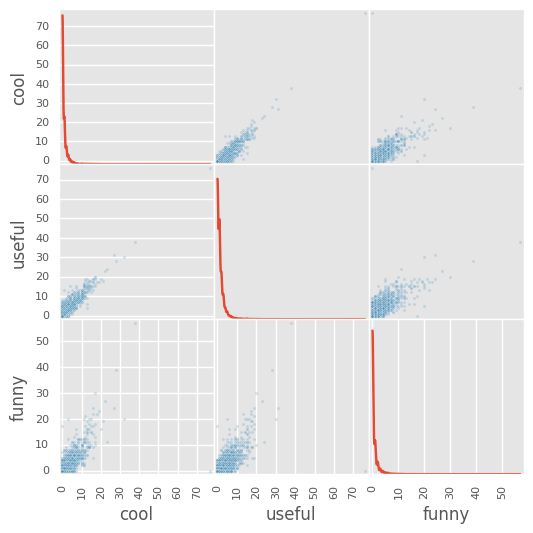

In [7]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
import matplotlib
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')
scatter_matrix(yelp, alpha=0.2, figsize=(6, 6), diagonal='kde')

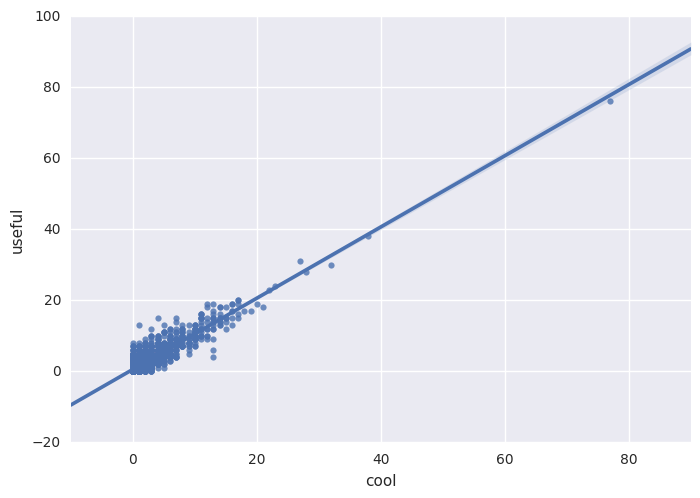

In [8]:
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(x=yelp['cool'], y=yelp['useful'], data=yelp)

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [14]:
feature_list = ['cool', 'useful', 'funny']
features = yelp[feature_list]

#yelp['stars_map'] = yelp.stars.map({'1': 1,
#                                    '2': 2,
#                                    '3': 3,
#                                    '4': 4,
#                                    '5': 5})
response = yelp['stars']

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(features, response)
print(lm.coef_)
print(lm.intercept_)

[ 0.27435947 -0.14745239 -0.13567449]
3.83989479278


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(
    features, response, test_size=0.33, random_state=11
)

In [31]:
# define a function that accepts a list of features and returns testing RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt



def getRMSE(feature_list):
    features = yelp[feature_list]
    response = yelp['stars']
    x_train, x_test, y_train, y_test = train_test_split(
        features, response, test_size=0.33, random_state=11
    )
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    prediction = lm.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, prediction))
    return(rmse)

In [32]:
# calculate RMSE with all three features
getRMSE(feature_list=['cool', 'useful', 'funny'])

1.18090408512632

## Task 6

Try removing some of the features and see if the RMSE improves.

In [33]:
getRMSE(feature_list=['cool', 'useful'])

1.1955521648085115

In [34]:
getRMSE(feature_list=['cool', 'funny'])

1.1848774764580932

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [ ]:
# new feature: 

In [ ]:
# new features: 


In [ ]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.